## Рассмотрим первую краевую задачу для уравнения переноса
\begin{cases}
   \frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = 0 \\
   u(0, t) = 1 & \\
   u(1, t) = 0 & \\
   u(x, 0) = 0 & 
 \end{cases}
При этом $$a = 0$$ и  $$ 0 < x < 1$$ , $$ 0 < t < 1 $$

In [7]:
# %matplotlib notebook
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Решим численно нашу задачу методом бегущего счета.
Так как рассматриваемое уравнение переноса является дифференциальным уравнением в частных производных первого порядка, то для его аппроксимации необходимо использовать шаблон, содержащий узлы сетки.

Будем рассматривать разностные схемы для уравнения переноса на равномерной сетке с шагом $h$ по переменной $x$ и шагом $τ$ по переменной $t$.
$$x_i = i · h, \hspace{0.5cm} i = 0, 1, ..., N$$
$$t_j = j · τ, \hspace{0.5cm} j = 0, 1, ..., K.$$

Дифференциальные операторы будем аппроксимировать отношением конечных разностей:
$$ \frac{\partial u}{\partial t} = \frac{u^{j+1}_i - u^j_i}{\tau}$$
$$ \frac{\partial u}{\partial x} = \frac{u^{j}_i - u^j_{i-1}}{h}$$
Таким образом,наша задача вместе с начально-краевые условия примут вид:
$$\frac{u^{j+1}_i - u^j_i}{\tau} + a\frac{u^{j}_i - u^j_{i-1}}{h} = 0$$
$$u(0, t) = u^j_0    $$
$$   u(1, t) = u^j_N    $$
$$   u(x, 0) = u^0_i  $$
При этом, решение будем искать в явном виде:
$$ u^{j+1}_i = u^j_i - a\frac{u^{j}_i - u^j_{i-1}}{h} = u^j_i(1 - \frac{a\tau}{h}) +  \frac{a\tau}{h}u^j_{i-1}$$

## Реализация метода бегущего счета:

In [2]:
def U(N,K):
    h = 1/N
    g = 1/K
    u = np.zeros((K,N))
    d = g/h
    for j in range(K):
        for i in range(N):
            u[0][i] = 0
            u[j][N - 1] = 0
            u[j][0] = 1
    for j in range(K - 1):
        for i in range (1,N):
            u[j + 1][i] = (1 - d)*u[j][i] + d*u[j][i - 1]
    return u

## Точное решение 
\begin{equation*}
u(x,t) = 
 \begin{cases}
   0 &\text{$0 \leq x \leq t$}\\
   1 &\text{$t \leq x \leq 1$}
 \end{cases}
\end{equation*}

In [6]:
def Exact(K,N):
    h = 1/N #шаг по х, 0 < x < l , N -кол-во шагов
    g = 1/K
    # Строим сетку 
    x = np.arange (0, 1, h)
    t = np.arange (0, 1, g)
    # Создаем двумерную матрицу-сетку
    xgrid, tgrid = np.meshgrid(x, t)
    zgrid1 = np.zeros((K,N))
    # В узлах рассчитываем значение функции
    for i in range(N) :
        for j in range(K):
            xx = x[i] 
            tt = t[j]
            if (xx <= 1 and xx >= tt):
                zgrid1[j][i] = 0
            else:
                zgrid1[j][i] = 1
    return xgrid, tgrid, zgrid1

## Вывод графиков точного решения и результата ,полученного методом бегущего счета

<IPython.core.display.Javascript object>


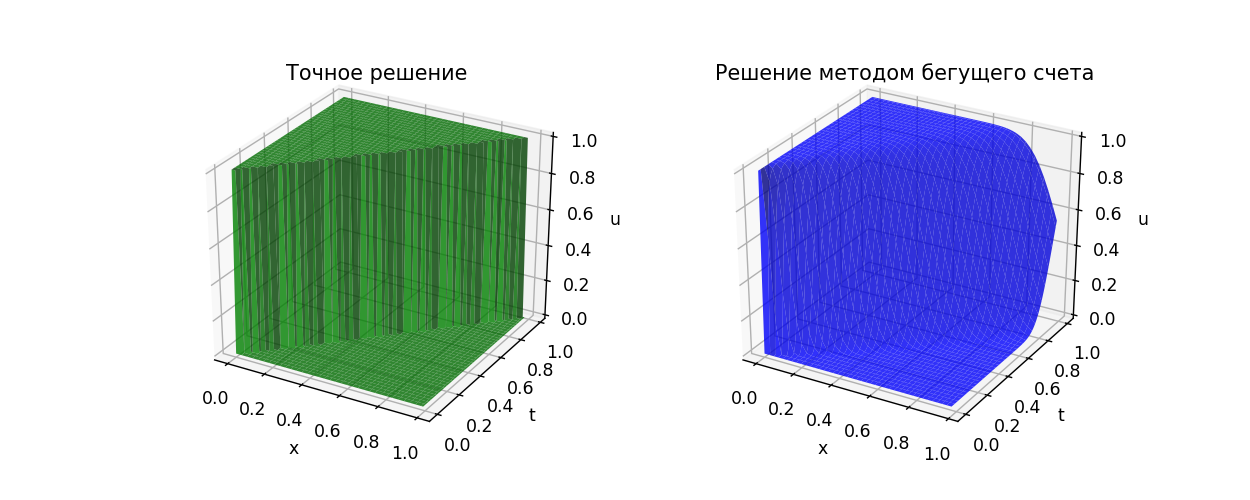

In [8]:

def New_U(N,K):
    # Шаг: по x и t
    h = 1/N #шаг по х, 0 < x < l , N -кол-во шагов
    g = 1/K
    # Строим сетку 
    x = np.arange (0, 1, h)
    t = np.arange (0, 1, g)
    # Создаем двумерную матрицу-сетку
    xgrid, tgrid = np.meshgrid(x, t)
    zgrid1 = np.zeros((N,K))
    zgrid1 = U(N,K)
    return xgrid, tgrid,zgrid1

x, t, u_ex = Exact(41,101)
x_n,t_n,u_new = New_U(41,101)

fig, ax = plt.subplots(1, 2, figsize=(10,4), subplot_kw=dict(projection='3d'))
ax[0].set_xlabel('x')
ax[0].set_ylabel('t')
ax[0].set_zlabel('u')
ax[0].set_title("Точное решение")
ax[0].plot_surface(x,t,u_ex,color = 'green',alpha = 0.8 ) #точное решение - ступеньк
ax[1].set_xlabel('x')
ax[1].set_ylabel('t')
ax[1].set_zlabel('u')
ax[1].set_title("Решение методом бегущего счета")
ax[1].plot_surface(x_n,t_n, u_new,color = 'blue' , alpha = 0.8) #численное решение  
pylab.show()


## Поиск норм в С и L2

In [4]:
def Norma1_C(N,K):
    x,y,u =Exact(K,N)
    u_new = U(N,K)
    u = np.zeros((K,N))
    m = np.zeros((K,N))
    u_max = 0
    m_max = 0
    Norma1_C = 0
    for j in range(K):
        for i in range(N):
            u[j][i] =u_new[j][i] - u[j][i]
            m[j][i] = u[j][i]
            if u[j][i] > u_max:
                u_max = u[j][i]
            if m[j][i] > m_max: 
                m_max = m[j][i]
    Norma1_C = u_max/m_max
    return Norma1_C

def Norma2_L(N,K):
    x,y,u =Exact(K,N)
    u_new = U(N,K)
    u_d = np.zeros(K)
    m = np.zeros(K)
    Norma1_C = 0
    for j in range(K):
        for i in range(N):
            u_d[j] +=abs(u_new[j][i] - u[j][i]) 
            m[j] += abs(u[j][i])
    Norma2_L = np.max(u_d)/np.max(m)
    return Norma2_L

def Diffrent_h(Mas,K):
    res1 = np.zeros(len(Mas))
    res2 = np.zeros(len(Mas))
    for i in range(len(Mas)):
        res1[i] = Norma1_C(Mas[i],K)
        res2[i] = Norma2_L(Mas[i],K)
    return res1,res2

mass = [1000,500,250,100]
KK = 100
Norma1,Norma2 = Diffrent_h(mass,KK)[0],Diffrent_h(mass,KK)[1]

## Графики изменения ошибок 

<IPython.core.display.Javascript object>


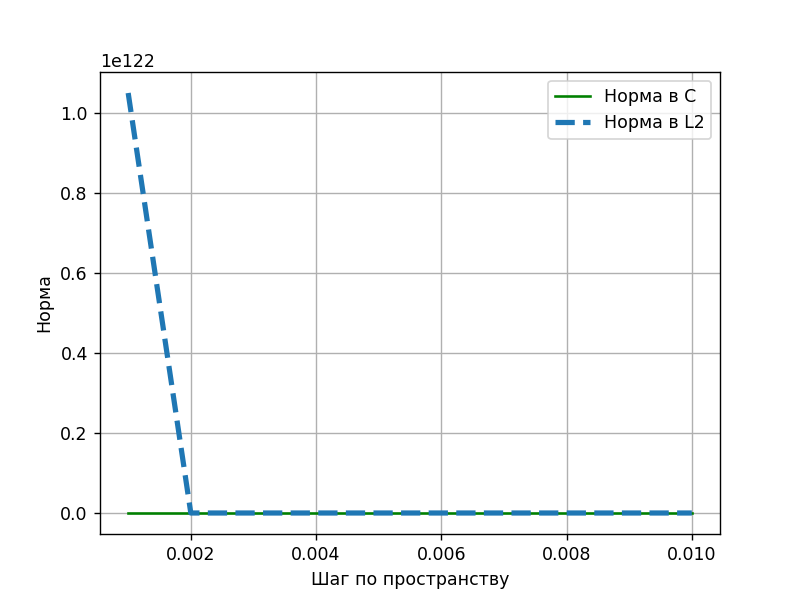

In [5]:
def H(m):
    h = np.zeros(len(m))
    for i in range(len(m)):
        h[i] = 1/m[i]
    return h
step = H(mass)

fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel(u'Шаг по пространству')
ax.set_ylabel(u'Норма')
ax.plot(step,Norma1, label = 'Норма в C', color = 'g')
ax.plot(step,Norma2,'--', label = 'Норма в L2',lw = 3)
ax.legend()
plt.show()